# K-means clustering


The basic method for lossy data compression and summarization. Unsupervised method

- Initialize $k$ cluster centers
- Associations: Find the points closest to each cluster center and form groups
- Recalculate means: Set the cluster center to the mean of each group

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
plt.rcParams["animation.html"] = "jshtml"

from IPython import display

N = 30
D = 2

# Generate a data set
X1 = 0.3*np.random.randn(D,N//2) 
X2 = 0.8*np.random.randn(D,N//2) + 3*np.ones((D, N//2))
X = np.hstack((np.mat(X1), np.mat(X2)))

In [2]:
K = 3;

idx = np.random.choice(N, replace=False, size=K)
mu = 0*X[:,idx] + 3*np.random.randn(D, K)
#plt.plot(mu[0,:],mu[1,:],'ro')

# Number of epochs
EP = 20

fig = plt.figure(figsize=(6,6))
plt.plot(X[0,:], X[1,:],'kx')

ax = fig.gca()
ln = plt.Line2D(xdata=mu[0,:], ydata=mu[1,:], marker='o', color='r',linestyle=None,linewidth=0)
ax.add_line(ln)


def animate(e):
    global mu
    ln.set_xdata(mu[0,:])
    ln.set_ydata(mu[1,:])

    dist = np.zeros((N,K))
    for i in range(N):
        for c in range(K):
            err = X[:,i]-mu[:,c]
            dist[i,c] = float(err.T*err)
    
    # Assignments
    a = np.argmin(dist, axis=1)
    
    mu = np.mat(np.zeros((D,K)))
    count = np.zeros((K))
    for i,c in enumerate(a):
        count[c] += 1
        mu[:,c] = (count[c]-1)/count[c]*mu[:,c] + 1./count[c]*X[:,i]
    
    



animation = matplotlib.animation.FuncAnimation(fig, animate, frames=EP)

from IPython.display import HTML
HTML(animation.to_jshtml())
    


$\newcommand{\trace}{\mathop{\text{Tr}}}$

Suppose we are given a data matrix $X$ of size $D \times N$ ($N$ samples each having dimension $D$). We wish
to represent this dataset using $K$ cluster centers. The cluster centers are stored in a $D \times K$ matrix. 
A binary assignment matrix $C$ encodes at each column the nearest cluster center with the convention that $C(k, i) = 1$ when the nearest 
cluster center to $X(:,i)$ is $M(:,k)$ and $C(k, i) = 0$ otherwise.

Using this encoding, K-means clustering can be viewed as an approximate matrix factorization problem where we 
wish to minimize 
$$
\| E\|_F^2
$$
where 
\begin{eqnarray}
E &= & X - M C \\
\end{eqnarray}
with the additional constrained that the assignment matrix is binary, with the constraint
$\sum_k C(k,j) = 1$. 

Given the assignment matrix, the cluster center matrix $M$ can be found 
by minimizing the error with respect to $M$ (see Matrix Calculus.ipynb) We find the gradient and set 
it to zero.

\begin{eqnarray}
\|E\|_F^2 & = & \trace \left( X^\top X + C^\top M^\top M C - 2 X^\top M C \right) \\
\frac{d\|E\|_F^2}{d M} & = & 2 M C C^\top - 2 X C^\top \\
M & = & X C^\top (C C^\top)^{-1}
\end{eqnarray}
This is the means of the assignments. To see this fix $C$
As the assignment matrix $C$ is binary $X C^\top$ is 
$$
\sum_k X(d,i) (C^\top)(i,k)
$$
This $k$'th column of this matrix is the sums of all data points asigned to $k$'th cluster center. The $K \times K$ matrix
$$
C C^\top
$$
is diagonal, with the number of points assigned to cluster $k$ at $(C C^\top)(k,k)$. The inverse of a diagonal matrix is just the reciprocal of each entry at the diagonal -- postmultiplying $(C C^\top)^{-1}$ with $X C^\top$ results in dividing each column with the number of assignments so we obtain the arithmetic mean of each cluster. 

Given the cluster center matrix $M$, we can now find the best $C$ by finding the nearest cluster center for each $X(:,i)$ and setting $C(k,i) = 1$ when $M(:,k)$ is the nearest.

This is an alternating minimization schema where we greedly minimize the error for $C$ with fixed $M$, than for $M$ with fixed $C$.

Traceback (most recent call last):
  File "/Users/cemgil/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/cemgil/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/cemgil/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/animation.py", line 1081, in _start
    self._init_draw()
  File "/Users/cemgil/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/animation.py", line 1792, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Users/cemgil/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/animation.py", line 1814, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-2-a015364e2c87>", line 27, in animate
    dist[i,c] = float(err.T*err)
TypeError: only length-1 arrays can be converted to Python scalars


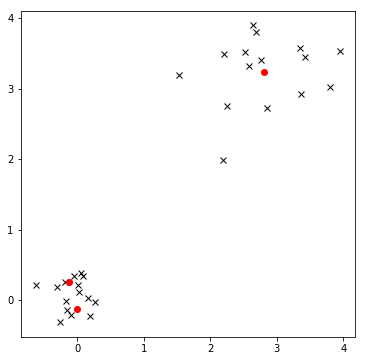

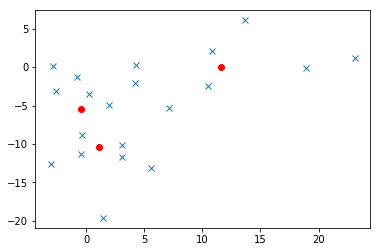

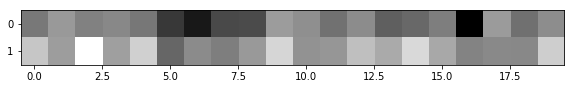

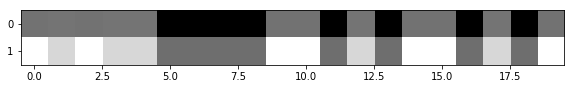

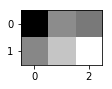

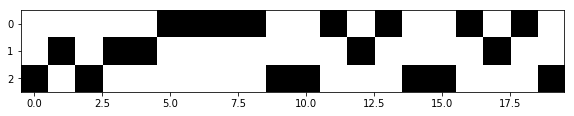

In [3]:

D = 2
N = 20
K = 3
sig = 4

M = 10*np.random.randn(D,K)
C = np.random.multinomial(1, np.ones(K)/K, N).T
C

X_hat = M.dot(C) 
X = X_hat + sig*np.random.randn(D, N)
M = X.dot(C.T).dot(np.linalg.inv(C.dot(C.T)))

plt.figure()
plt.plot(X[0,:],X[1,:],'x')
plt.plot(M[0,:],M[1,:],'or')

plt.show()

plt.figure(figsize=(N/2, D/2))
plt.imshow(X, cmap='gray_r')
plt.show()

plt.figure(figsize=(N/2, D/2))
plt.imshow(X_hat, cmap='gray_r')
plt.show()

plt.figure(figsize=(K/2, D/2))
plt.imshow(M, cmap='gray_r')
plt.show()

plt.figure(figsize=(N/2, K/2))
plt.imshow(C, cmap='gray_r')
plt.show()


